# Factores de éxito en canciones para ser tendencia en Spotify México 2021

Los datos utilizados provienen de dos fuentes distintas:
https://spotifycharts.com/home/ y https://developer.spotify.com/, de charts.spotify.com contiene las canciones más escuchadas semanalmente en México, proporcionándonos como muestra los datos del 11/03/2021 hasta 02/09/2021.

In [61]:
import os
import numpy as np
import pandas as pd
week_streams = []
for dirname,_,filenames in os.walk('../data/external/'):
    for filename in filenames:
        print (os.path.join(filename))
        code = filename[:2]
        if not (code in week_streams) and code.isalpha() and code.isupper():
            week_streams.append (code)
week_streams.sort()
week_streams

.gitkeep
regional-mx-weekly-2021-03-11.csv
regional-mx-weekly-2021-03-18.csv
regional-mx-weekly-2021-03-25.csv
regional-mx-weekly-2021-04-01.csv
regional-mx-weekly-2021-04-08.csv
regional-mx-weekly-2021-04-15.csv
regional-mx-weekly-2021-04-22.csv
regional-mx-weekly-2021-04-29.csv
regional-mx-weekly-2021-05-06.csv
regional-mx-weekly-2021-05-13.csv
regional-mx-weekly-2021-05-20.csv
regional-mx-weekly-2021-05-27.csv
regional-mx-weekly-2021-06-03.csv
regional-mx-weekly-2021-06-10.csv
regional-mx-weekly-2021-06-17.csv
regional-mx-weekly-2021-06-24.csv
regional-mx-weekly-2021-07-01.csv
regional-mx-weekly-2021-07-08.csv
regional-mx-weekly-2021-07-15.csv
regional-mx-weekly-2021-07-22.csv
regional-mx-weekly-2021-07-29.csv
regional-mx-weekly-2021-08-05.csv
regional-mx-weekly-2021-08-12.csv
regional-mx-weekly-2021-08-19.csv
regional-mx-weekly-2021-08-26.csv
regional-mx-weekly-2021-09-02.csv


[]

In [62]:
import os
import numpy as np
import pandas as pd
import glob

all_files=glob.glob("../data/external/regional-mx-weekly*.csv")
print("Numero de archivos:",len(all_files),"\n")

file_list=[]
for i in all_files:
    data=pd.read_csv(i)
    nombre=os.path.basename(i)
    data['source_file']=nombre
    file_list.append(data)
    
df=pd.concat(file_list,ignore_index=True)
print("Numero de filas:",len(df))
df.head(204)

Numero de archivos: 26 

Numero de filas: 5198


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,source_file
0,1,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,Kali Uchis,telepatía,EMI / Interscope,1,3,4,4977494,regional-mx-weekly-2021-03-11.csv
1,2,spotify:track:4MzXwWMhyBbmu6hOcLVD49,"Bad Bunny, Jhay Cortez",DÁKITI,Rimas Entertainment LLC,1,1,19,4808495,regional-mx-weekly-2021-03-11.csv
2,3,spotify:track:7vrJn5hDSXRmdXoR30KgF1,KAROL G,BICHOTA,UMLE - Latino,2,2,20,4410610,regional-mx-weekly-2021-03-11.csv
3,4,spotify:track:1xK1Gg9SxG8fy2Ya373oqb,"Myke Towers, Juhn",Bandido,White World Music,3,4,12,4036515,regional-mx-weekly-2021-03-11.csv
4,5,spotify:track:2XIc1pqjXV3Cr2BQUGNBck,"Bad Bunny, ROSALÍA",LA NOCHE DE ANOCHE,Rimas Entertainment LLC,3,5,15,3704524,regional-mx-weekly-2021-03-11.csv
...,...,...,...,...,...,...,...,...,...,...
199,200,spotify:track:1diS6nkxMQc3wwC4G1j0bh,Dua Lipa,We're Good,Warner Records,109,-1,3,603147,regional-mx-weekly-2021-03-11.csv
200,1,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,Kali Uchis,telepatía,EMI / Interscope,1,1,5,5044703,regional-mx-weekly-2021-03-18.csv
201,2,spotify:track:4MzXwWMhyBbmu6hOcLVD49,"Bad Bunny, Jhay Cortez",DÁKITI,Rimas Entertainment LLC,1,2,20,4798328,regional-mx-weekly-2021-03-18.csv
202,3,spotify:track:7vrJn5hDSXRmdXoR30KgF1,KAROL G,BICHOTA,UMLE - Latino,2,3,21,4293750,regional-mx-weekly-2021-03-18.csv


Al querer trabajar con datos de corte transversal, tuve que sumar las reproducciones semanales de cada cancion para conocer sus reproducciones totales en aproximadamente 6 meses.

Ya que se puede identificar la canción por su 'Uri' las otras columnas no son necesarias

In [66]:
df=pd.DataFrame(df)
df=df.groupby('uri').streams.sum()
df=pd.DataFrame(df)
df

,streams
uri,
spotify:track:00jpfco62YfQj1BBYCCuKH,4051501
spotify:track:00szcRmgqJGtqrfIUYkM1h,24711771
spotify:track:017PF4Q3l4DBUiWoXk4OWT,11778346
spotify:track:03LfOYi0icz4souspZVVhq,8754615
spotify:track:059bcIhyc2SBwm6sw2AZzd,9978800
...,...
spotify:track:7vrJn5hDSXRmdXoR30KgF1,12770574
spotify:track:7wnO6pBzcWWT8zT4vFx7hM,4507455
spotify:track:7x4ASXYEKfQBCewcZhK776,3305171


Ordenando las canciones por el numero de reproducciones para observar los extremos:

Como observacion, sumando las reproducciones semanales, quedan 447 canciones.

Lo pase a un archivo csv para despues agregar las caracteristicas que tienen cada cancion.

In [79]:
df=df.sort_values('streams')
print(df)
df.to_csv("../data/interim/datos_sum.csv")

                                      uri    streams
419  spotify:track:7EUvcSFkyVB73zrblhQmEL     608040
218  spotify:track:43Z6YxVTYyr5ewyo2uepdy     609073
273  spotify:track:4skuEIloXWuxxgekKupkEH     609256
360  spotify:track:6Im9k8u9iIzKMrmV7BWtlF     609591
395  spotify:track:6ocbgoVGwYJhOv1GgI9NsF     610280
..                                    ...        ...
397  spotify:track:6tDDoYIxWvMLTdKpjFkc1B   74503626
110  spotify:track:2JPLbjOn0wPCngEot2STUS   88058478
237  spotify:track:4MzXwWMhyBbmu6hOcLVD49   89982950
412  spotify:track:7Bk0uXKk1uPT0XuQbpFzvs   94288622
116  spotify:track:2MnLkFqY9Rpg9s3Zv6ZJdK  116313570

[447 rows x 2 columns]


Con el identificador de las canciones(uri) y la Api de Spotify adquirimos las características de estas junto con el siguiente programa.

In [81]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pandas as pd

In [82]:
client_credentials_manager = SpotifyClientCredentials(client_id="e3aa2b0ba2664fc384f7081a2121f66c",
                                                    client_secret="c2123cf1707f4a95a384f7a3a7b570c0")
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [83]:
import pandas as pd
archivo="../data/interim/datos_sum.csv"
df=pd.read_csv(archivo)
#print(df)
uri=df['uri'].tolist()
#uri
i=0
for i in range(len(uri)-1):
    if i==0:
        df=pd.concat([pd.DataFrame(sp.audio_features(uri[i]),columns=['danceability','energy','duration_ms','loudness','speechiness','instrumentalness','liveness','valence','tempo','acousticness']),
                  pd.DataFrame(sp.audio_features(uri[i+1]),columns=['danceability','energy','duration_ms','loudness','speechiness','instrumentalness','liveness','valence','tempo','acousticness'])],
                  ignore_index=True)
    
    else:
        df=pd.concat([df,
                  pd.DataFrame(sp.audio_features(uri[i+1]),columns=['danceability','energy','duration_ms','loudness','speechiness','instrumentalness','liveness','valence','tempo','acousticness'])],
                  ignore_index=True)
print('numero de filas:',len(df))
print(df.head())
#df.to_csv("../data/interim/features.csv")

numero de filas: 447
   danceability  energy  duration_ms  loudness  speechiness  instrumentalness  \
0         0.762   0.645       187429    -5.422       0.2720          0.000013   
1         0.756   0.565       226280    -9.832       0.0287          0.001280   
2         0.394   0.475       278547    -7.935       0.0280          0.007490   
3         0.830   0.585       173711    -6.476       0.0940          0.000000   
4         0.778   0.317       178627   -10.732       0.3340          0.000000   

   liveness  valence    tempo  acousticness  
0    0.1180    0.640  180.125        0.2410  
1    0.2430    0.655  101.944        0.3090  
2    0.1120    0.441  129.995        0.0251  
3    0.2480    0.485  109.978        0.2370  
4    0.0881    0.327  140.048        0.5920  


Lo pase a un archivo csv para juntarlo con las reproducciones que tienen cada cancion del archivo anterior.

In [84]:
df.to_csv("../data/interim/features.csv")

In [117]:
import pandas as pd
archivo1='../data/interim/datos_sum.csv'
df1=pd.read_csv(archivo1)

archivo2='../data/interim/features.csv'
df2=pd.read_csv(archivo2)

df=pd.merge(df1,df2,left_index=True,right_index=True)
df=df.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1)
df.to_parquet('../data/processed/Streamsfeatures.parquet')
df

,uri,streams,danceability,energy,duration_ms,loudness,speechiness,instrumentalness,liveness,valence,tempo,acousticness
0,spotify:track:7EUvcSFkyVB73zrblhQmEL,608040,0.762,0.645,187429,-5.422,0.2720,0.000013,0.1180,0.640,180.125,0.2410
1,spotify:track:43Z6YxVTYyr5ewyo2uepdy,609073,0.756,0.565,226280,-9.832,0.0287,0.001280,0.2430,0.655,101.944,0.3090
2,spotify:track:4skuEIloXWuxxgekKupkEH,609256,0.394,0.475,278547,-7.935,0.0280,0.007490,0.1120,0.441,129.995,0.0251
3,spotify:track:6Im9k8u9iIzKMrmV7BWtlF,609591,0.830,0.585,173711,-6.476,0.0940,0.000000,0.2480,0.485,109.978,0.2370
4,spotify:track:6ocbgoVGwYJhOv1GgI9NsF,610280,0.778,0.317,178627,-10.732,0.3340,0.000000,0.0881,0.327,140.048,0.5920
...,...,...,...,...,...,...,...,...,...,...,...,...
442,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,74503626,0.653,0.524,160191,-9.016,0.0502,0.000000,0.2030,0.553,83.970,0.1120
443,spotify:track:2JPLbjOn0wPCngEot2STUS,88058478,0.644,0.648,206710,-4.601,0.1180,0.000000,0.1350,0.440,179.951,0.2760
444,spotify:track:4MzXwWMhyBbmu6hOcLVD49,89982950,0.731,0.573,205090,-10.059,0.0544,0.000052,0.1130,0.145,109.928,0.4010
445,spotify:track:7Bk0uXKk1uPT0XuQbpFzvs,94288622,0.849,0.701,261667,-4.407,0.0600,0.000000,0.1120,0.505,98.005,0.4070


Ya con los datos realize una visualizacion general de los datos:

In [118]:
import pandas as pd
music=pd.read_parquet('../data/processed/Streamsfeatures.parquet')
music

,uri,streams,danceability,energy,duration_ms,loudness,speechiness,instrumentalness,liveness,valence,tempo,acousticness
0,spotify:track:7EUvcSFkyVB73zrblhQmEL,608040,0.762,0.645,187429,-5.422,0.2720,0.000013,0.1180,0.640,180.125,0.2410
1,spotify:track:43Z6YxVTYyr5ewyo2uepdy,609073,0.756,0.565,226280,-9.832,0.0287,0.001280,0.2430,0.655,101.944,0.3090
2,spotify:track:4skuEIloXWuxxgekKupkEH,609256,0.394,0.475,278547,-7.935,0.0280,0.007490,0.1120,0.441,129.995,0.0251
3,spotify:track:6Im9k8u9iIzKMrmV7BWtlF,609591,0.830,0.585,173711,-6.476,0.0940,0.000000,0.2480,0.485,109.978,0.2370
4,spotify:track:6ocbgoVGwYJhOv1GgI9NsF,610280,0.778,0.317,178627,-10.732,0.3340,0.000000,0.0881,0.327,140.048,0.5920
...,...,...,...,...,...,...,...,...,...,...,...,...
442,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,74503626,0.653,0.524,160191,-9.016,0.0502,0.000000,0.2030,0.553,83.970,0.1120
443,spotify:track:2JPLbjOn0wPCngEot2STUS,88058478,0.644,0.648,206710,-4.601,0.1180,0.000000,0.1350,0.440,179.951,0.2760
444,spotify:track:4MzXwWMhyBbmu6hOcLVD49,89982950,0.731,0.573,205090,-10.059,0.0544,0.000052,0.1130,0.145,109.928,0.4010
445,spotify:track:7Bk0uXKk1uPT0XuQbpFzvs,94288622,0.849,0.701,261667,-4.407,0.0600,0.000000,0.1120,0.505,98.005,0.4070


In [103]:
from pandas_profiling import ProfileReport
profile=ProfileReport(music,title="Features")
#quitar el comentario para obtener el archivo html
profile.to_file("reporte.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

TemplateNotFound: wrapper/assets/jquery-1.12.4.min.js

Despues de revisar el reporte y como trabajare con una regresion lineal decidi revisar mas a fondo la correlacion entre las variables

No considere la columna 'instrumentalnes ya que todos sus valores son cero o muy cercanos a cero.

In [119]:
archivo = '../data/processed/Streamsfeatures.parquet'
df = pd.read_parquet(archivo)  
df['instrumentalness']

0      0.000013
1      0.001280
2      0.007490
3      0.000000
4      0.000000
         ...   
442    0.000000
443    0.000000
444    0.000052
445    0.000000
446    0.000000
Name: instrumentalness, Length: 447, dtype: float64

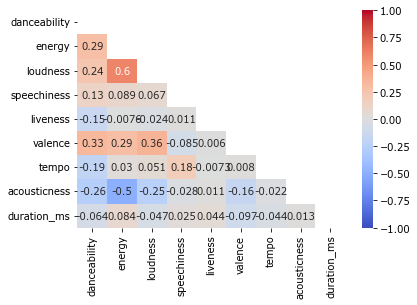

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
archivo = "../data/interim/Streamsfeatures.parquet"
df = pd.read_parquet(archivo,columns=['danceability','energy','loudness','speechiness','liveness','valence','tempo','acousticness','duration_ms'])
#print(df)
df=pd.DataFrame(df)
upp_mat = np.triu(df.corr())
fig=sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)
#plt.show()

### Observando tendencias en los datos

In [122]:
import pandas as pd 
import altair as alt
import numpy as np
data=pd.read_parquet("../data/processed/Streamsfeatures.parquet")

df=pd.DataFrame(data,columns=['streams','danceability','energy','duration_ms','loudness','speechiness','instrumentalness','liveness','valence','tempo','acousticness'])

alt.Chart(df).mark_circle(size=60).encode(
    x='danceability',
    y='streams',
    tooltip=['danceability','streams']
).interactive()

alt.Chart(...)

In [123]:
alt.Chart(df).mark_circle(size=60).encode(
    x= 'energy',
    y='streams',
    tooltip=[ 'energy','streams']
).interactive()

alt.Chart(...)

In [22]:
alt.Chart(df).mark_circle(size=60).encode(
    x='duration_ms',
    y='streams',
    tooltip=['duration_ms','streams']
).interactive()

alt.Chart(...)

Se observa que en algunas variables hay cierta tendencia a si que procedí a proponer modelos de regresion lineal multiple:

In [125]:
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
data=pd.read_parquet("../data/processed/Streamsfeatures.parquet")

In [126]:
df=pd.DataFrame(data,columns=['streams','duration_ms','loudness'])
df['logduration'] = np.log(data['duration_ms'])
df['logstreams'] = np.log(data['streams'])
df.head(150)

,streams,duration_ms,loudness,logduration,logstreams
0,608040,187429,-5.422,12.141155,13.317996
1,609073,226280,-9.832,12.329528,13.319693
2,609256,278547,-7.935,12.537342,13.319994
3,609591,173711,-6.476,12.065148,13.320544
4,610280,178627,-10.732,12.093055,13.321673
...,...,...,...,...,...
145,4257970,185080,-4.460,12.128543,15.264303
146,4315804,199552,-4.026,12.203830,15.277794
147,4459470,191945,-3.945,12.164964,15.310540
148,4480757,189050,-6.521,12.149767,15.315303


In [127]:
x=df.drop(['streams','logstreams','duration_ms'],axis=1).values
y=df['logstreams'].values

In [128]:
print(x)

[[ -5.422       12.14115539]
 [ -9.832       12.32952845]
 [ -7.935       12.53734209]
 [ -6.476       12.06514828]
 [-10.732       12.09305511]
 [ -7.056       12.22895386]
 [ -7.594       12.4134973 ]
 [ -3.455       12.12702944]
 [ -5.979       12.2626987 ]
 [ -3.604       12.36873556]
 [ -4.84        12.07672108]
 [ -6.404       12.27662896]
 [ -9.718       12.53973021]
 [ -4.76        12.11502586]
 [ -5.371       12.37800711]
 [ -6.591       12.14532958]
 [ -5.946       12.50316158]
 [ -9.381       12.64709793]
 [ -3.889       12.37333555]
 [ -5.629       11.89900386]
 [ -3.877       12.14412809]
 [ -5.421       11.98083941]
 [ -7.147       12.24481247]
 [ -5.41        12.03661795]
 [ -3.945       12.16496415]
 [ -8.238       12.25910617]
 [ -6.27        12.0822313 ]
 [-13.785       12.21090595]
 [ -7.096       11.9573292 ]
 [ -6.044       12.59486283]
 [ -4.25        12.2373775 ]
 [ -4.501       12.12325609]
 [-10.974       12.12728914]
 [ -5.733       12.24279505]
 [ -3.51      

In [129]:
print(y)

[13.31799595 13.31969341 13.31999382 13.32054352 13.32167315 13.32740976
 13.33253516 13.33366104 13.33504277 13.3361836  13.33781018 13.34171415
 13.34386879 13.34391046 13.34530371 13.34546373 13.34809717 13.36304503
 13.36672659 13.3680243  13.37241835 13.37532046 13.38119062 13.38231859
 13.39585474 13.40137447 13.40239073 13.40514999 13.40681875 13.40766261
 13.41384572 13.4168999  13.43056547 13.44007938 13.44541597 13.44921232
 13.45037132 13.45095752 13.48163375 13.49478174 13.50250931 13.50339371
 13.52491892 13.5646476  13.58732431 13.58866391 13.60082985 13.61032971
 13.70869676 13.81527353 13.87278463 13.90810888 14.00338086 14.00647879
 14.01790676 14.0191899  14.03545219 14.04451053 14.04580448 14.05698114
 14.06270808 14.0750547  14.08968785 14.12322832 14.14769433 14.16554118
 14.18508179 14.19963966 14.20590061 14.22802079 14.2293386  14.24692148
 14.25092986 14.25499377 14.26218607 14.32036237 14.35180566 14.37572331
 14.38014061 14.43803246 14.44047579 14.45220114 14

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,shuffle=True)

In [131]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [132]:
y_pred=ml.predict(x_test)
#print(y_pred)

In [133]:
ml.predict([[-10.732,12.093055]])

array([14.45414985])

-10.732	12.093055	13.321673

In [134]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.07420859653334722

Text(0.5, 1.0, 'Actual vs Predicted')

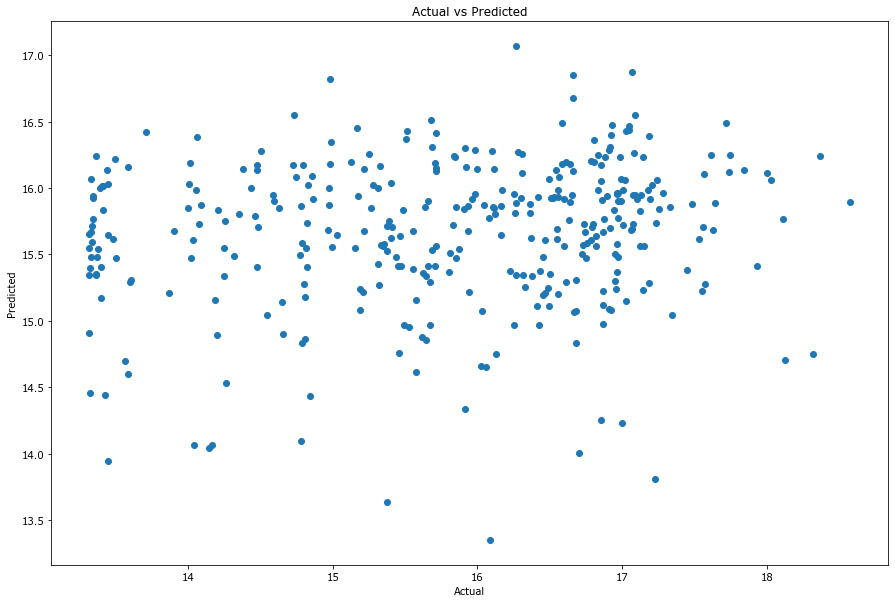

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [136]:
pred_y_df=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Diference':y_test-y_pred})
pred_y_df[100:150]

,Actual value,Predicted value,Diference
100,13.588664,16.157898,-2.569234
101,14.246921,15.548620,-1.301699
102,16.973071,15.900702,1.072368
103,17.623349,15.681851,1.941498
104,16.960248,15.578209,1.382040
105,16.657063,16.673916,-0.016853
106,16.681585,14.834163,1.847423
107,15.657258,15.901013,-0.243755
108,13.450371,15.643843,-2.193472
109,13.335043,15.667742,-2.332699
